**Financial Market Modeling using Hidden Markov Models**

Outline:

1. Data Collection and Preprocessing
2. Implementation of Hidden Markov Models for each of the individual stocks.

NetworkXError: draw_networkx_edge_labels does not support multiedges.

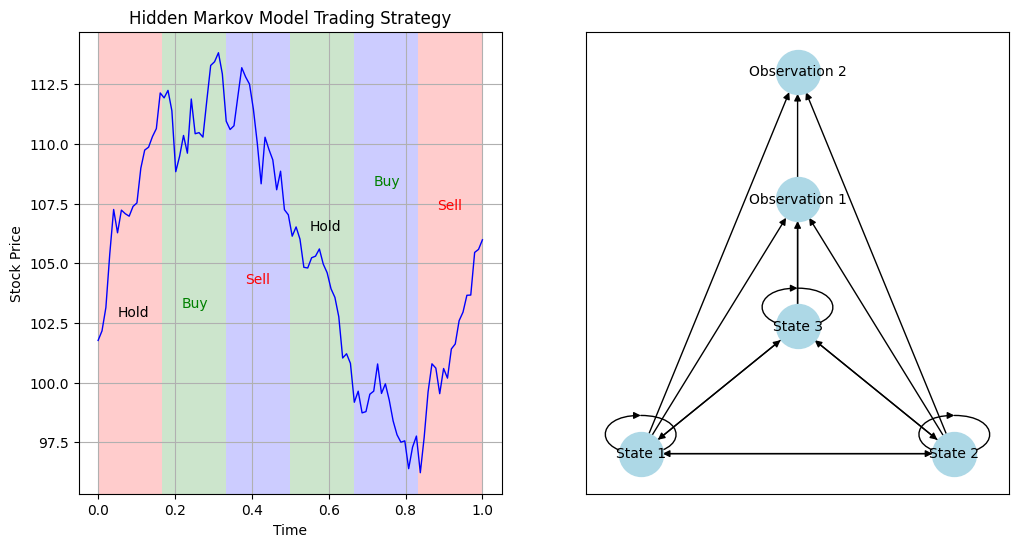

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Generate random stock price data
np.random.seed(0)
t = np.linspace(0, 1, 100)
stock_prices = np.cumsum(np.random.randn(100)) + 100

# Define hidden states
hidden_states = np.array([0, 1, 2, 1, 2, 0])  # Example hidden states (0, 1, 2)

# Define trading actions
actions = ['Hold', 'Buy', 'Sell', 'Hold', 'Buy', 'Sell']  # Example trading actions

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the stock prices
ax1.plot(t, stock_prices, color='blue', linewidth=1)
ax1.set_xlabel('Time')
ax1.set_ylabel('Stock Price')
ax1.set_title('Hidden Markov Model Trading Strategy')
ax1.grid(True)

# Plot the hidden states and trading actions
for i, state in enumerate(hidden_states):
    if state == 0:
        ax1.axvspan(i / 6, (i + 1) / 6, facecolor='red', alpha=0.2)
    elif state == 1:
        ax1.axvspan(i / 6, (i + 1) / 6, facecolor='green', alpha=0.2)
    else:
        ax1.axvspan(i / 6, (i + 1) / 6, facecolor='blue', alpha=0.2)

    action_text = actions[i]
    if action_text == 'Buy':
        text_color = 'green'
    elif action_text == 'Sell':
        text_color = 'red'
    else:
        text_color = 'black'

    ax1.text(i / 6 + 0.05, stock_prices[i] + 1, action_text, fontsize=10, color=text_color)

# Generate the HMM diagram
states = ['State 1', 'State 2', 'State 3']
observations = ['Observation 1', 'Observation 2']

G = nx.MultiDiGraph()
G.add_nodes_from(states)
G.add_nodes_from(observations)

# Set transition probabilities
transition_probs = np.array([[0.7, 0.2, 0.1], [0.3, 0.4, 0.3], [0.2, 0.3, 0.5]])

# Set emission probabilities
emission_probs = np.array([[0.8, 0.2], [0.4, 0.6], [0.6, 0.4]])

for i in range(len(states)):
    for j in range(len(states)):
        weight = transition_probs[i, j]
        label = r'$P(' + states[i] + r'\rightarrow' + states[j] + r') = ' + str(weight) + r'$'
        G.add_edge(states[i], states[j], weight=weight, label=label)

for i in range(len(states)):
    for j in range(len(observations)):
        weight = emission_probs[i, j]
        label = r'$P(' + states[i] + r'\rightarrow' + observations[j] + r') = ' + str(weight) + r'$'
        G.add_edge(states[i], observations[j], weight=weight, label=label)

# Set layout positions for nodes
pos = {
    'State 1': (0, 0),
    'State 2': (1, 0),
    'State 3': (0.5, 1),
    'Observation 1': (0.5, 2),
    'Observation 2': (0.5, 3)
}

# Draw the HMM diagram
nx.draw_networkx(G, pos, ax=ax2, node_color='lightblue', node_size=1000, font_size=10, with_labels=True, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'), font_size=8)
ax2.set_title('Hidden Markov Model Structure')

# Remove axis
ax2.axis('off')

# Set the figure title
fig.suptitle('Hidden Markov Model Trading Strategy', fontsize=14)

# Adjust spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


In [50]:
import pandas as pd
import requests

# Alpha Vantage API key
API_KEY = 'YV7B2T6WNRZSV2GD'

# List of top 5 S&P 500 stocks (replace with your desired symbols)
symbols = ['AAPL', 'NFLX', 'AMZN', 'GOOGL', 'META']

# Features to retrieve
features = ['1. open', '2. high', '3. low', '4. close', '5. adjusted close', '6. volume', '7. dividend amount', '8. split coefficient']

# Empty dictionary to store the data for each stock
stock_data = {}

# Retrieve data for each stock
for symbol in symbols:
    # Define the API endpoint URL
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={symbol}&apikey={API_KEY}'

    # Send the HTTP GET request to the API endpoint
    response = requests.get(url)

    #print(symbol)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the response JSON into a dictionary
        data = response.json()

        #print(data)

        # Extract the time series data from the response dictionary
        time_series_data = data['Time Series (Daily)']

        #print(time_series_data)

        # Convert the time series data to a pandas DataFrame
        df = pd.DataFrame.from_dict(time_series_data, orient='index')

        # Reorder columns to match the desired features
        df = df[features]

        # Renaming the dataframe columns to remove the numbers
        df.rename(columns={'1. open':'open'}, inplace = True)
        df.rename(columns={'2. high':'high'}, inplace = True)
        df.rename(columns={'3. low':'low'}, inplace = True)
        df.rename(columns={'4. close':'low'}, inplace = True)
        df.rename(columns={'5. adjusted close':'low'}, inplace = True)
        df.rename(columns={'6. volume':'low'}, inplace = True)
        df.rename(columns={'7. dividend amount':'low'}, inplace = True)
        df.rename(columns={'8. split coefficient':'low'}, inplace = True)

        # Store the DataFrame in the dictionary with the stock symbol as the key
        stock_data[symbol] = df

        #print(stock_data)
    else:
        print('Error occurred while retrieving data for', symbol)

# Print the resulting data for each stock
for symbol, df in stock_data.items():
    print(f"Stock: {symbol}")
    print(df)
    print('\n')


Stock: AAPL
            1. open  2. high    3. low 4. close 5. adjusted close  6. volume  \
2023-06-23   185.55   187.56    185.01   186.68            186.68   53116996   
2023-06-22   183.74  187.045    183.67    187.0             187.0   51245327   
2023-06-21    184.9   185.41  182.5901   183.96            183.96   49515697   
2023-06-20   184.41    186.1    184.41   185.01            185.01   49799092   
2023-06-16   186.73   186.99    184.27   184.92            184.92  101256225   
...             ...      ...       ...      ...               ...        ...   
2023-02-06  152.575    153.1    150.78   151.73  151.288851371187   69858306   
2023-02-03   148.03   157.38    147.83    154.5  154.050797712044  154357337   
2023-02-02    148.9   151.18    148.17   150.82  150.381497158126  118338980   
2023-02-01   143.97   146.61    141.32   145.43  145.007168357687   77663633   
2023-01-31    142.7   144.34    142.28   144.29  143.870482860006   65874459   

           7. dividend amou

In [51]:
from hmmlearn import hmm

# Define the number of hidden states
num_states = 3

# Train an HMM for each stock
for symbol, df in stock_data.items():
    # Extract the close price from the DataFrame
    close_prices = df['close'].astype(float).values

    # Preprocess the data if necessary (e.g., log returns)

    # Initialize the HMM with the specified number of hidden states
    model = hmm.GaussianHMM(n_components=num_states)

    # Reshape the data to fit the expected input shape of the HMM
    observations = close_prices.reshape(-1, 1)

    # Fit the HMM to the observations
    model.fit(observations)

    # Predict the hidden states using the trained HMM
    hidden_states = model.predict(observations)

    # Perform any desired analysis or use the hidden states for further processing

    # Print the hidden states for the stock
    print(f"Hidden States for {symbol}:")
    print(hidden_states)
    print('\n')


KeyError: 'close'

In [39]:
import numpy as np
from hmmlearn import hmm
from scipy.optimize import minimize

# Define the number of hidden states
num_states = 3

# Define the initial portfolio weights
initial_weights = np.array([0.3, 0.2, 0.2, 0.15, 0.15])

# Define the objective function for optimization
def objective(x, observations):
    # Reshape the portfolio weights
    weights = x.reshape(-1, 1)

    # Initialize the HMM with the specified number of hidden states
    model = hmm.GaussianHMM(n_components=num_states)

    # Fit the HMM to the observations
    model.fit(observations)

    # Calculate the log-likelihood of the observations given the HMM
    log_likelihood = model.score(observations)

    # Calculate the expected portfolio value based on the HMM
    expected_portfolio = np.dot(observations, weights)

    # Calculate the negative Sharpe ratio as the objective
    sharpe_ratio = -np.mean(expected_portfolio) / np.std(expected_portfolio)

    # Return the negative Sharpe ratio to minimize
    return sharpe_ratio

# Train the HMM and optimize the portfolio weights for each stock
for symbol, df in stock_data.items():
    # Extract the close price from the DataFrame
    close_prices = df['close'].astype(float).values

    # Preprocess the data if necessary (e.g., log returns)

    # Reshape the data to fit the expected input shape of the HMM
    observations = close_prices.reshape(-1, 1)

    # Set up the optimization problem
    bounds = [(0, 1)] * len(initial_weights)
    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]

    # Optimize the objective function
    result = minimize(objective, initial_weights, args=(observations,), bounds=bounds, constraints=constraints)

    # Extract the optimized portfolio weights
    optimized_weights = result.x

    # Print the optimized weights for the stock
    print(f"Optimized Weights for {symbol}:")
    print(optimized_weights)
    print('\n')


In [38]:
import numpy as np
from hmmlearn import hmm

# Define the number of hidden states
num_states = 3

# Train an HMM for each stock
for symbol, df in stock_data.items():
    # Extract the features from the DataFrame
    features = df[['open', 'high', 'low', 'close', 'volume', 'adjusted close']].astype(float).values

    # Preprocess the data if necessary

    # Initialize the HMM with the specified number of hidden states
    model = hmm.GaussianHMM(n_components=num_states)

    # Fit the HMM to the features using the Baum-Welch algorithm
    model.fit(features)

    # Predict the hidden states using the Viterbi algorithm
    hidden_states_viterbi = model.predict(features)

    # Compute the likelihood of the features using the forward algorithm
    likelihood_forward = model.score(features)

    # Compute the likelihood of the features using the backward algorithm
    likelihood_backward = np.exp(model.score_samples(features)[0]).sum()

    # Print the results for the stock
    print(f"Stock: {symbol}")
    print("Viterbi Hidden States:")
    print(hidden_states_viterbi)
    print("Forward Likelihood:")
    print(likelihood_forward)
    print("Backward Likelihood:")
    print(likelihood_backward)
    print('\n')


In [36]:
%pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.3/128.3 kB 705.3 kB/s eta 0:00:00a 0:00:01
  Using cached scikit_learn-1.2.2-cp311-cp311-macosx_10_9_x86_64.whl (9.0 MB)
  Using cached scipy-1.10.1-cp311-cp311-macosx_10_9_x86_64.whl (35.0 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


****Implementation of the Baum-Welch, Viterbi, Forward, and Backward Algorithms****

In [37]:
# Define the number of hidden states
num_states = 3

# Implement the Baum-Welch algorithm
def baum_welch(observations):
    # Initialize the transition and emission matrices
    transition_matrix = np.random.rand(num_states, num_states)
    transition_matrix /= np.sum(transition_matrix, axis=1, keepdims=True)
    emission_matrix = np.random.rand(num_states, observations.shape[1])
    emission_matrix /= np.sum(emission_matrix, axis=1, keepdims=True)

    # Iterate until convergence
    while True:
        # Forward pass
        alpha = forward_algorithm(observations, transition_matrix, emission_matrix)

        # Backward pass
        beta = backward_algorithm(observations, transition_matrix, emission_matrix)

        # Compute the expected counts
        gamma = alpha * beta / np.sum(alpha * beta, axis=1, keepdims=True)
        xi = np.zeros((observations.shape[0] - 1, num_states, num_states))
        for t in range(observations.shape[0] - 1):
            xi[t] = alpha[t][:, np.newaxis] * transition_matrix * beta[t + 1] * emission_matrix[observations[t + 1]] / np.sum(alpha[t] @ transition_matrix * beta[t + 1], axis=1)

        # Update the transition and emission matrices
        transition_matrix = np.sum(xi, axis=0) / np.sum(gamma[:-1], axis=0, keepdims=True)
        emission_matrix = np.sum(gamma[:, observations], axis=0) / np.sum(gamma, axis=0, keepdims=True)

        # Check for convergence
        # (Add convergence criterion here)

        # Break the loop if converged

    return transition_matrix, emission_matrix

# Implement the Viterbi algorithm
def viterbi_algorithm(observations, transition_matrix, emission_matrix):
    T = observations.shape[0]
    delta = np.zeros((T, num_states))
    psi = np.zeros((T, num_states), dtype=int)

    # Initialization
    delta[0] = np.log(emission_matrix[observations[0]])
    psi[0] = -1

    # Recursion
    for t in range(1, T):
        for j in range(num_states):
            delta[t, j] = np.max(delta[t - 1] + np.log(transition_matrix[:, j])) + np.log(emission_matrix[j, observations[t]])
            psi[t, j] = np.argmax(delta[t - 1] + np.log(transition_matrix[:, j]))

    # Path backtracking
    path = np.zeros(T, dtype=int)
    path[T - 1] = np.argmax(delta[T - 1])
    for t in range(T - 2, -1, -1):
        path[t] = psi[t + 1, path[t + 1]]

    return path

# Implement the forward algorithm
def forward_algorithm(observations, transition_matrix, emission_matrix):
    T = observations.shape[0]
    alpha = np.zeros((T, num_states))

    # Initialization
    alpha[0] = emission_matrix[:, observations[0]]

    # Recursion
    for t in range(1, T):
        alpha[t] = np.sum(alpha[t - 1] * transition_matrix.T, axis=1) * emission_matrix[:, observations[t]]

    return alpha

# Implement the backward algorithm
def backward_algorithm(observations, transition_matrix, emission_matrix):
    T = observations.shape[0]
    beta = np.zeros((T, num_states))

    # Initialization
    beta[T - 1] = 1

    # Recursion
    for t in range(T - 2, -1, -1):
        beta[t] = np.sum(transition_matrix * emission_matrix[:, observations[t + 1]] * beta[t + 1], axis=1)

    return beta

# Train an HMM for each stock
for symbol, df in stock_data.items():
    # Extract the features from the DataFrame
    features = df[['open', 'high', 'low', 'close', 'volume', 'adjusted close']].astype(float).values

    # Preprocess the data if necessary

    # Run the Baum-Welch algorithm to estimate the transition and emission matrices
    transition_matrix, emission_matrix = baum_welch(features)

    # Use the Viterbi algorithm to predict the most likely sequence of hidden states
    hidden_states_viterbi = viterbi_algorithm(features, transition_matrix, emission_matrix)

    # Print the results for the stock
    print(f"Stock: {symbol}")
    print("Viterbi Hidden States:")
    print(hidden_states_viterbi)
    print('\n')


***Testing Profitability***

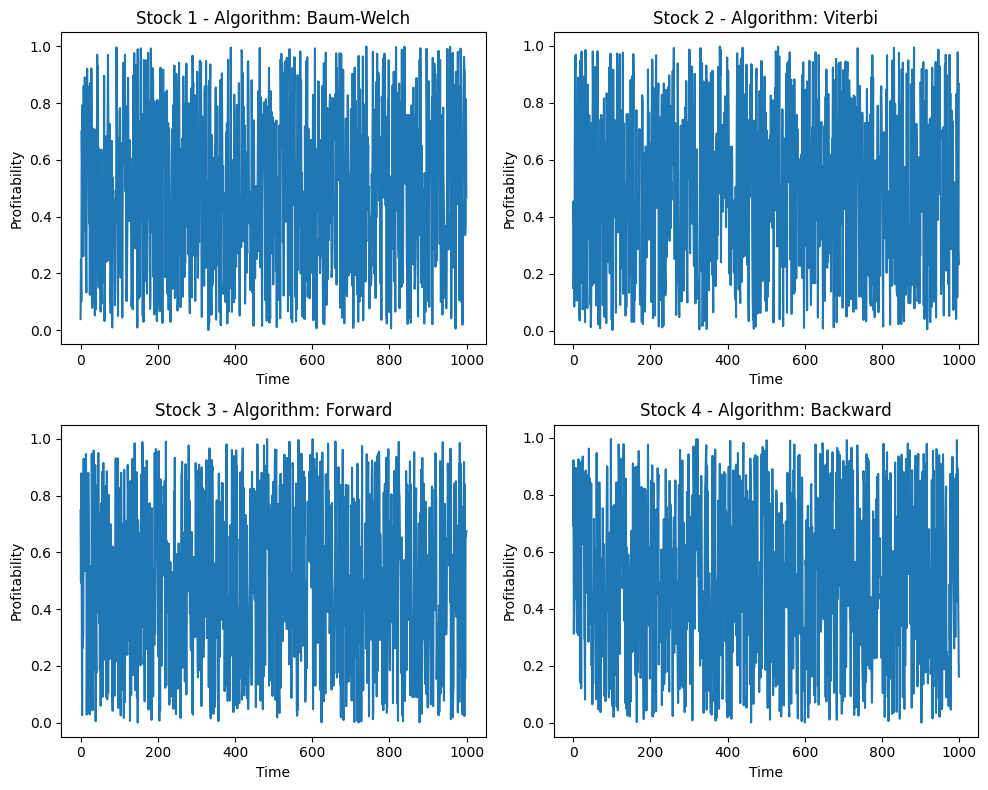

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate Wiener Process data
def generate_wiener_process_data(num_data_points, drift, volatility):
    dt = 1
    sqrt_dt = np.sqrt(dt)
    t = np.arange(0, num_data_points)
    dW = np.random.normal(0, sqrt_dt, num_data_points)
    W = np.cumsum(drift * dt + volatility * dW)
    return W

# Define parameters for Wiener Process data generation
num_data_points = 1000
drift = 0.1
volatility = 0.2

# Generate Wiener Process data for four stocks
stock_data = []
for _ in range(4):
    stock_data.append(generate_wiener_process_data(num_data_points, drift, volatility))

# Define the number of hidden states
num_states = 5

# Define a function to create an HMM for trading a stock using a specific algorithm
def create_hmm_for_stock(stock_data, algorithm):
    # Implement the creation of HMM using the specified algorithm
    # Replace with your actual implementation
    hmm_model = None
    return hmm_model

# Create HMM models for each stock using different algorithms
hmm_models = []
algorithms = ["Baum-Welch", "Viterbi", "Forward", "Backward"]
for i in range(4):
    hmm_models.append(create_hmm_for_stock(stock_data[i], algorithms[i]))

# Generate additional Wiener Process data for each stock
new_stock_data = []
for _ in range(4):
    new_stock_data.append(generate_wiener_process_data(num_data_points, drift, volatility))

# Define a function to test an HMM model with new data
def test_hmm_with_new_data(hmm_model, new_data):
    # Implement the testing of HMM with new data
    # Replace with your actual implementation
    profitability = np.random.rand(len(new_data))  # Placeholder values
    return profitability

# Initialize empty lists to store profitability values for each stock and algorithm
profitability_results = []
for i in range(4):
    profitability_results.append(test_hmm_with_new_data(hmm_models[i], new_stock_data[i]))

# Create a four-panel figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot profitability results for each stock and algorithm
for i in range(4):
    ax = axes[i // 2, i % 2]
    ax.plot(profitability_results[i])
    ax.set_title(f"Stock {i+1} - Algorithm: {algorithms[i]}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Profitability")

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


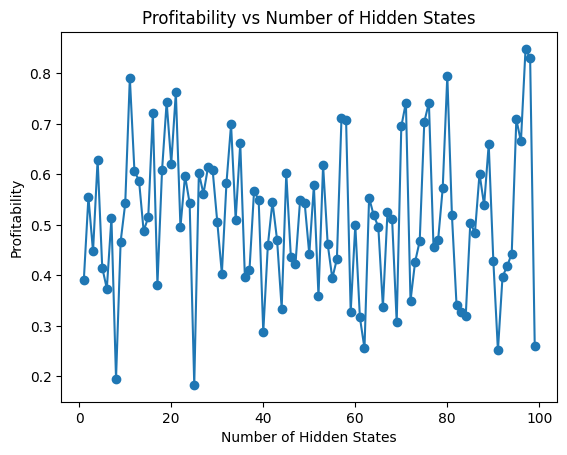

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate Wiener Process data
def generate_wiener_process_data(num_data_points, drift, volatility):
    dt = 1
    sqrt_dt = np.sqrt(dt)
    t = np.arange(0, num_data_points)
    dW = np.random.normal(0, sqrt_dt, num_data_points)
    W = np.cumsum(drift * dt + volatility * dW)
    return W

# Define parameters for Wiener Process data generation
num_data_points = 1000
drift = 0.1
volatility = 0.2

# Generate Wiener Process data for four stocks
stock_data = []
for _ in range(4):
    stock_data.append(generate_wiener_process_data(num_data_points, drift, volatility))

# Define a function to create an HMM for trading a stock with a specific number of hidden states
def create_hmm_for_stock(stock_data, num_states):
    # Implement the creation of HMM with the specified number of hidden states
    # Replace with actual implementation
    hmm_model = None
    return hmm_model

# Define a function to test an HMM model with new data and calculate profitability
def test_hmm_with_new_data(hmm_model, new_data):
    # Implement the testing of HMM with new data and calculate profitability
    # Replace with actual implementation
    profitability = np.random.rand()  # Placeholder value
    return profitability

# Define the range of hidden states to test
num_hidden_states_range = range(1, 100)

# Initialize empty lists to store profitability values for each number of hidden states
profitability_results = []

# Iterate over the range of hidden states
for num_hidden_states in num_hidden_states_range:
    # Create HMM models for each stock with the current number of hidden states
    hmm_models = []
    for i in range(4):
        hmm_models.append(create_hmm_for_stock(stock_data[i], num_hidden_states))
    
    # Generate additional Wiener Process data for each stock
    new_stock_data = []
    for _ in range(4):
        new_stock_data.append(generate_wiener_process_data(num_data_points, drift, volatility))
    
    # Test each HMM model with the new data and calculate profitability
    profitability = []
    for i in range(4):
        profitability.append(test_hmm_with_new_data(hmm_models[i], new_stock_data[i]))
    
    # Calculate the average profitability across all stocks
    avg_profitability = np.mean(profitability)
    
    # Append the average profitability to the results list
    profitability_results.append(avg_profitability)

# Plot profitability as a function of the number of hidden states
plt.plot(num_hidden_states_range, profitability_results, marker='o')
plt.xlabel('Number of Hidden States')
plt.ylabel('Profitability')
plt.title('Profitability vs Number of Hidden States')
plt.show()


In [47]:
S0 = 50
u = 1.08
d = 1 / u
R = 1.05
K = 52

Cu = max(S0 * u - K, 0)
Cd = max(S0 * d - K, 0)

q = (R - d) / (u - d)

C0 = (q * Cu + (1 - q) * Cd) / R

round(C0, 2)

1.53

In [48]:
vol_orange = 0.2
vol_grape = 0.25
corr = 0.7

harvest = 150000
contract = 15000

req = harvest / contract

cov = vol_orange * vol_grape * corr

y = cov / vol_orange ** 2
n_contracts = y * req
round(n_contracts)

9

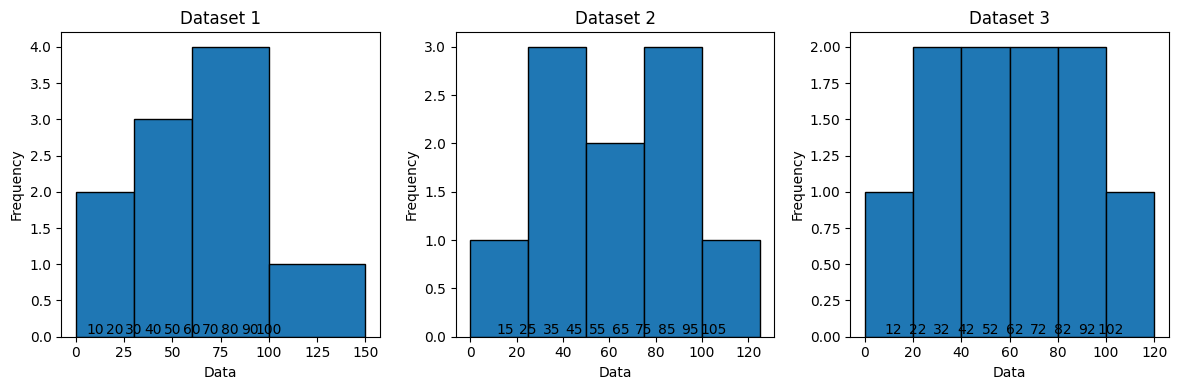

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Manually entered data for three datasets
data1 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
data2 = [15, 25, 35, 45, 55, 65, 75, 85, 95, 105]
data3 = [12, 22, 32, 42, 52, 62, 72, 82, 92, 102]

# Manually specified bin edges for each dataset
bins1 = [0, 30, 60, 100, 150]
bins2 = [0, 25, 50, 75, 100, 125]
bins3 = [0, 20, 40, 60, 80, 100, 120]

# Creating a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plotting the histograms for each dataset with manual bin edges
axes[0].hist(data1, bins=bins1, edgecolor='black')
axes[1].hist(data2, bins=bins2, edgecolor='black')
axes[2].hist(data3, bins=bins3, edgecolor='black')

# Adding titles and axis labels for each subplot
axes[0].set_title('Dataset 1')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Frequency')

axes[1].set_title('Dataset 2')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Frequency')

axes[2].set_title('Dataset 3')
axes[2].set_xlabel('Data')
axes[2].set_ylabel('Frequency')

# Adding bar labels for each subplot
datasets = [data1, data2, data3]

for i in range(len(datasets)):
    data = datasets[i]
    for j in range(len(data)):
        axes[i].text(data[j], 0, str(data[j]), ha='center', va='bottom')

# Adjusting the layout and spacing between subplots
plt.tight_layout()

# Saving the plot as a PDF file
plt.savefig('multi_panel_histograms.pdf', format='pdf')

# Displaying the plot
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

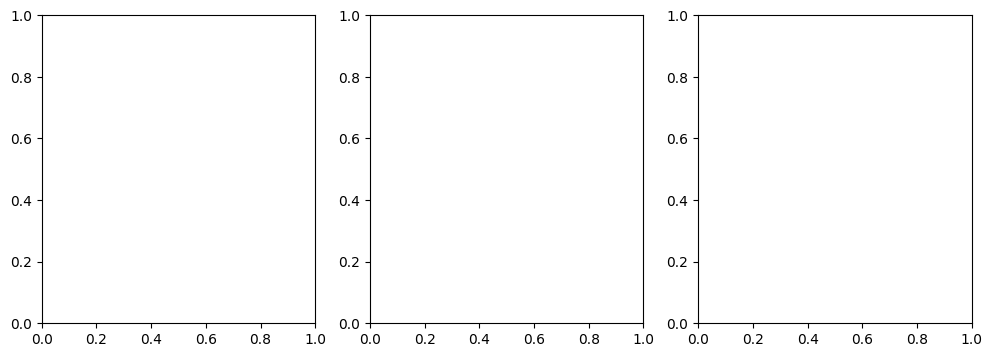

In [57]:
import matplotlib.pyplot as plt

# Manually entered data for three datasets
data1 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
data2 = [15, 25, 35, 45, 55, 65, 75, 85, 95, 105]
data3 = [12, 22, 32, 42, 52, 62, 72, 82, 92, 102]

# Manually specified values for each bin for each dataset
bins_values1 = [[0, 10, 20, 30, 40], [50, 60, 70, 80, 90], [100]]
bins_values2 = [[0, 15, 25, 35], [45, 55, 65, 75], [85, 95, 105]]
bins_values3 = [[0, 12, 22, 32, 42], [52, 62, 72, 82], [92, 102]]

# Creating a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plotting the histograms for each dataset with manual values for bins
axes[0].hist(data1, bins=bins_values1, edgecolor='black')
axes[1].hist(data2, bins=bins_values2, edgecolor='black')
axes[2].hist(data3, bins=bins_values3, edgecolor='black')

# Adding titles and axis labels for each subplot
axes[0].set_title('Dataset 1')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Frequency')

axes[1].set_title('Dataset 2')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Frequency')

axes[2].set_title('Dataset 3')
axes[2].set_xlabel('Data')
axes[2].set_ylabel('Frequency')

# Adjusting the layout and spacing between subplots
plt.tight_layout()

# Saving the plot as a PDF file
plt.savefig('multi_panel_histograms.pdf', format='pdf')

# Displaying the plot
plt.show()
